In [21]:
# Getting the stock data

import yfinance as yf
import pandas as pd

# Define the stock symbols
symbols = ['VGT', 'VDE', 'VNQ']

# Loop through each symbol to fetch and save data
for symbol in symbols:
    # Fetch data for the last 10 years
    data = yf.download(symbol, start="2012-01-01", end="2022-01-01")
    
    # Calculate volatility as the difference between High and Low prices
    data['Volatility'] = data['High'] - data['Low']
    
    # Extract relevant columns
    data_filtered = data[['Adj Close', 'Volatility', 'Volume']]
    
    # Rename 'Adj Close' to 'Price'
    data_filtered = data_filtered.rename(columns={'Adj Close': 'Price'})
    
    # Save the DataFrame to a CSV file
    data_filtered.to_csv(f"{symbol}_10_years_relevant_data.csv")
    
    print(f"Successfully fetched and saved 10 years of relevant data for {symbol}.")

[*********************100%***********************]  1 of 1 completed
Successfully fetched and saved 10 years of relevant data for VGT.
[*********************100%***********************]  1 of 1 completed
Successfully fetched and saved 10 years of relevant data for VDE.
[*********************100%***********************]  1 of 1 completed
Successfully fetched and saved 10 years of relevant data for VNQ.


In [24]:
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime

# Define the start and end date
start = datetime(2012, 1, 1)
end = datetime(2022, 1, 1)

# Fetch Interest Rates (Effective Federal Funds Rate)
interest_rates = web.DataReader('FEDFUNDS', 'fred', start, end)

# Fetch GDP Growth Rates (Real Gross Domestic Product)
gdp_growth = web.DataReader('A191RL1Q225SBEA', 'fred', start, end)

# Fetch Inflation Rates (Consumer Price Index)
inflation_rates = web.DataReader('CPIAUCNS', 'fred', start, end)

# Fetch Unemployment Rates
unemployment_rates = web.DataReader('UNRATE', 'fred', start, end)

# Merge all data into a single DataFrame
macro_data = pd.concat([interest_rates, gdp_growth, inflation_rates, unemployment_rates], axis=1)
macro_data.columns = ['Interest Rates', 'GDP Growth Rates', 'Inflation Rates', 'Unemployment Rates']

# Save the DataFrame to a CSV file
macro_data.to_csv("US_Macroeconomic_Indicators_10_years.csv")

print("Successfully fetched and saved 10 years of US macroeconomic indicators.")


Successfully fetched and saved 10 years of US macroeconomic indicators.


Data Preprocessing and Exploratory Data Analysis on Each of the Three Stocks

Processing VDE_10_years_relevant_data.csv...
Missing values:
 Date          0
Price         0
Volatility    0
Volume        0
dtype: int64
Summary Statistics:
              Price   Volatility        Volume
count  2517.000000  2517.000000  2.517000e+03
mean     73.502348     1.567755  4.691743e+05
std      13.954222     0.761913  5.301462e+05
min      27.222696     0.329994  4.020000e+04
25%      67.589188     1.049995  1.525000e+05
50%      74.110817     1.380005  2.692000e+05
75%      82.088348     1.900002  5.805000e+05
max     107.689995     9.080002  5.786700e+06
Correlation Matrix:
                Price  Volatility    Volume
Price       1.000000   -0.139542 -0.557310
Volatility -0.139542    1.000000  0.399797
Volume     -0.557310    0.399797  1.000000


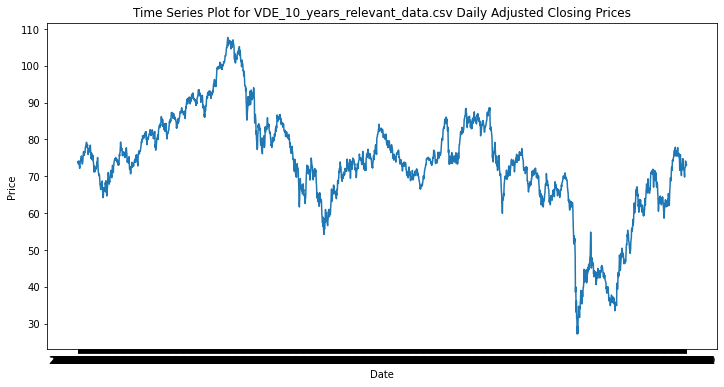

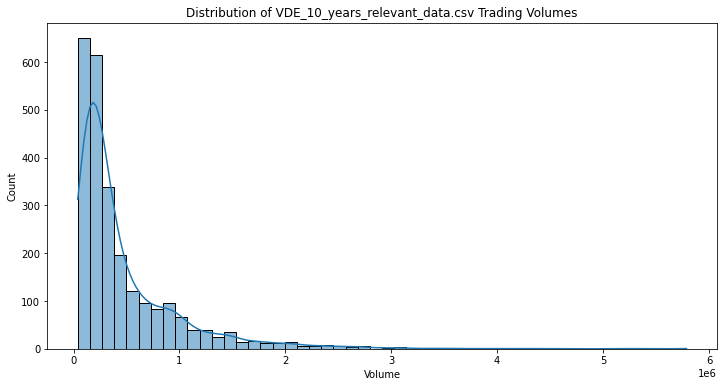

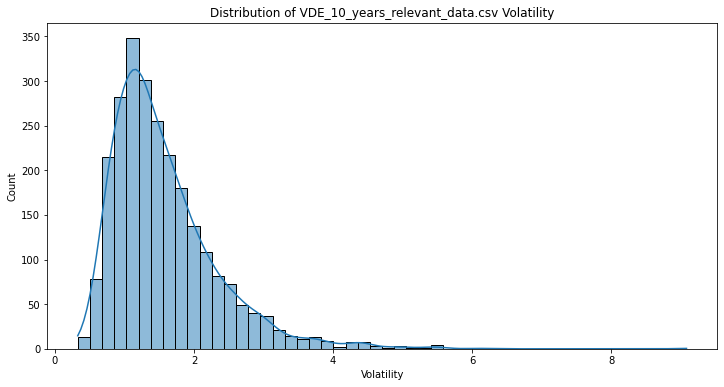

Completed processing VDE_10_years_relevant_data.csv

Processing VGT_10_years_relevant_data.csv...
Missing values:
 Date          0
Price         0
Volatility    0
Volume        0
dtype: int64
Summary Statistics:
              Price   Volatility        Volume
count  2517.000000  2517.000000  2.517000e+03
mean    160.102011     2.357477  4.719106e+05
std     101.377425     2.523512  4.154569e+05
min      55.453575     0.220001  5.280000e+04
25%      87.417107     0.829994  2.505000e+05
50%     115.754517     1.360001  3.605000e+05
75%     202.354752     2.899994  5.422000e+05
max     460.509247    23.409996  6.564500e+06
Correlation Matrix:
                Price  Volatility    Volume
Price       1.000000    0.659577  0.291672
Volatility  0.659577    1.000000  0.526943
Volume      0.291672    0.526943  1.000000


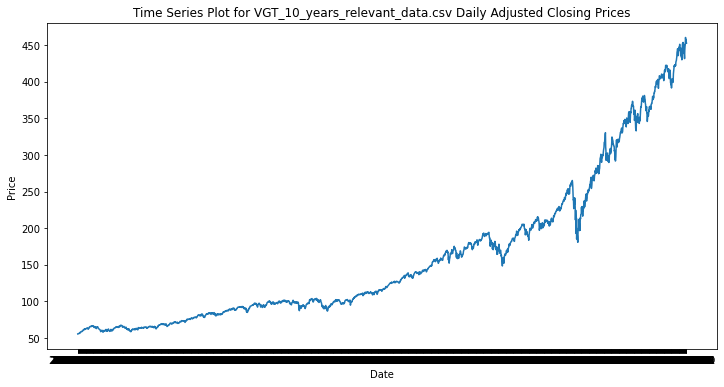

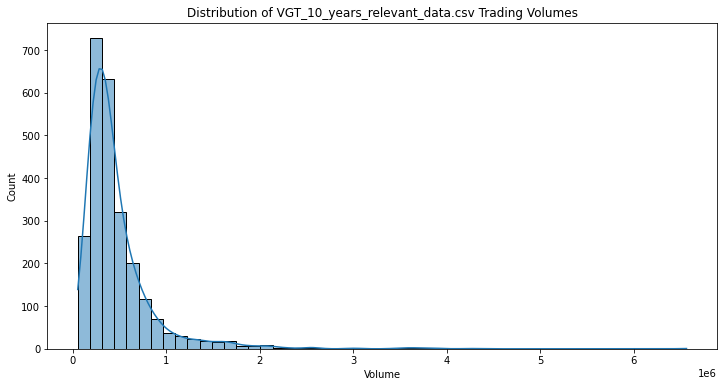

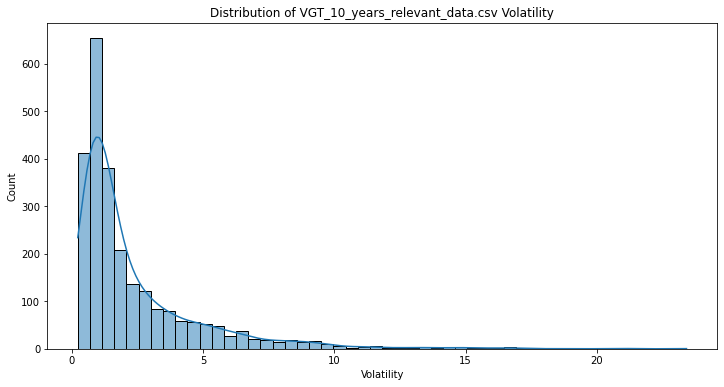

Completed processing VGT_10_years_relevant_data.csv

Processing VNQ_10_years_relevant_data.csv...
Missing values:
 Date          0
Price         0
Volatility    0
Volume        0
dtype: int64
Summary Statistics:
              Price   Volatility        Volume
count  2517.000000  2517.000000  2.517000e+03
mean     63.323909     1.072467  4.336618e+06
std      15.219299     0.646675  2.297188e+06
min      36.503754     0.199997  9.215000e+05
25%      51.679459     0.689995  2.839400e+06
50%      63.449200     0.919998  3.812800e+06
75%      71.472641     1.269997  5.185600e+06
max     109.492752     9.110001  2.247180e+07
Correlation Matrix:
                Price  Volatility    Volume
Price       1.000000    0.213906  0.266402
Volatility  0.213906    1.000000  0.609781
Volume      0.266402    0.609781  1.000000


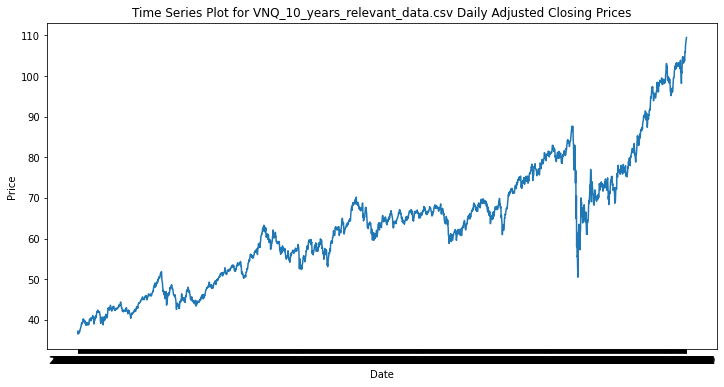

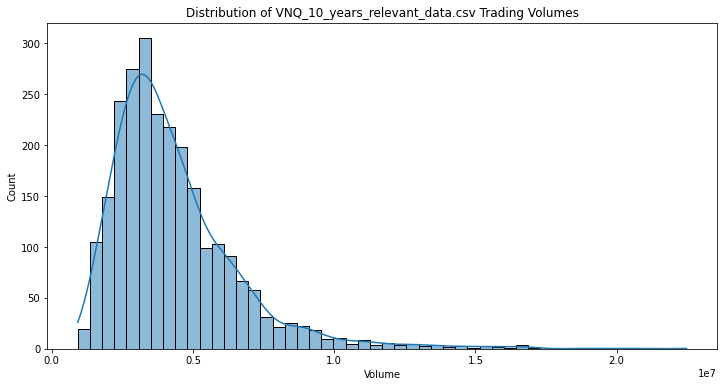

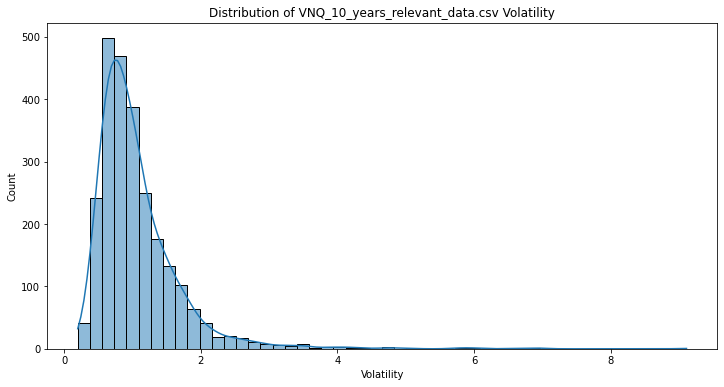

Completed processing VNQ_10_years_relevant_data.csv



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of stock CSV files
stock_files = ['VDE_10_years_relevant_data.csv', 'VGT_10_years_relevant_data.csv', 'VNQ_10_years_relevant_data.csv']

# Loop through each stock file to perform preprocessing and EDA
for stock_file in stock_files:
    print(f"Processing {stock_file}...")
    
    # Load the data
    df_stock = pd.read_csv(stock_file)
    
    # Check for missing values
    print("Missing values:\n", df_stock.isnull().sum())
    
    # Summary statistics
    print("Summary Statistics:\n", df_stock.describe())
    
    # Correlation analysis
    print("Correlation Matrix:\n", df_stock.corr())
    
    # Time Series Plot for daily adjusted closing prices (Price)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_stock, x='Date', y='Price')
    plt.title(f'Time Series Plot for {stock_file} Daily Adjusted Closing Prices')
    plt.show()
    
    # Histogram for trading volumes (Volume)
    plt.figure(figsize=(12, 6))
    sns.histplot(df_stock['Volume'], bins=50, kde=True)
    plt.title(f'Distribution of {stock_file} Trading Volumes')
    plt.show()
    
    # Histogram for Volatility
    plt.figure(figsize=(12, 6))
    sns.histplot(df_stock['Volatility'], bins=50, kde=True)
    plt.title(f'Distribution of {stock_file} Volatility')
    plt.show()
    
    print(f"Completed processing {stock_file}\n")


Data Preprocessing and Exploratory Data Analysis on macroeconomic indicators data for the U.S. 

In [27]:
import pandas as pd

# Load the macroeconomic indicators data
df_macro = pd.read_csv('US_Macroeconomic_Indicators_10_years.csv')

# Display the first few rows
print(df_macro.head())

         DATE  Interest Rates  GDP Growth Rates  Inflation Rates  \
0  2012-01-01            0.08               3.3          226.665   
1  2012-02-01            0.10               NaN          227.663   
2  2012-03-01            0.13               NaN          229.392   
3  2012-04-01            0.14               1.8          230.085   
4  2012-05-01            0.16               NaN          229.815   

   Unemployment Rates  
0                 8.3  
1                 8.3  
2                 8.2  
3                 8.2  
4                 8.2  


In [28]:
# Check for missing values
print("Missing values:\n", df_macro.isnull().sum())

# Check data types
print("Data Types:\n", df_macro.dtypes)


Missing values:
 DATE                   0
Interest Rates         0
GDP Growth Rates      80
Inflation Rates        0
Unemployment Rates     0
dtype: int64
Data Types:
 DATE                   object
Interest Rates        float64
GDP Growth Rates      float64
Inflation Rates       float64
Unemployment Rates    float64
dtype: object


Summary Statistics:
        Interest Rates  GDP Growth Rates  Inflation Rates  Unemployment Rates
count      121.000000         41.000000       121.000000          121.000000
mean         0.626612          2.414634       246.089760            5.699174
std          0.772038          7.597189        13.045725            1.942013
min          0.050000        -29.900000       226.665000            3.500000
25%          0.090000          1.300000       236.151000            4.200000
50%          0.140000          2.400000       242.839000            5.100000
75%          1.150000          3.400000       256.389000            6.700000
max          2.420000         35.300000       281.148000           14.700000
Correlation Matrix:
                     Interest Rates  GDP Growth Rates  Inflation Rates  \
Interest Rates            1.000000         -0.031327         0.276881   
GDP Growth Rates         -0.031327          1.000000         0.066226   
Inflation Rates           0.276881          0.

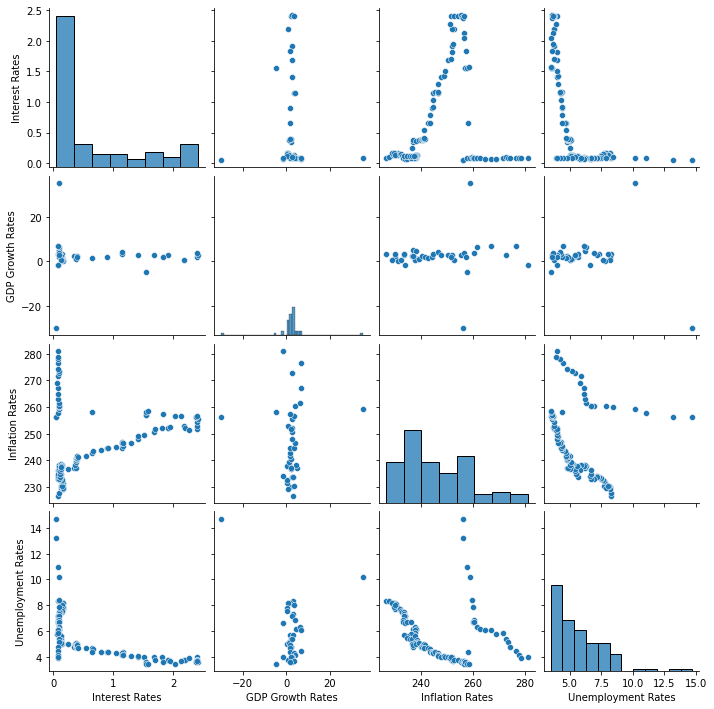

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary Statistics:\n", df_macro.describe())

# Correlation analysis
print("Correlation Matrix:\n", df_macro.corr())

# Pairplot to visualize relationships between variables
sns.pairplot(df_macro)
plt.show()


In [30]:
# Save the cleaned data
df_macro.to_csv('US_Macroeconomic_Indicators_10_years_cleaned.csv', index=False)


In [32]:
import pandas as pd

# Load the macroeconomic indicators data
df_macro = pd.read_csv('US_Macroeconomic_Indicators_10_years_cleaned.csv')
df_macro['DATE'] = pd.to_datetime(df_macro['DATE'])

# Set DATE as the index
df_macro.set_index('DATE', inplace=True)

# Resample to daily frequency using linear interpolation
df_macro_daily = df_macro.resample('D').interpolate()

# Load one of the stock data files (e.g., VDE)
df_stock = pd.read_csv('VDE_10_years_relevant_data.csv')
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Set Date as the index
df_stock.set_index('Date', inplace=True)

# Merge the stock data with the daily macroeconomic indicators
df_merged = pd.merge(df_stock, df_macro_daily, left_index=True, right_index=True, how='left')

# Display the first few rows of the merged DataFrame
print(df_merged.head())


                Price  Volatility  Volume  Interest Rates  GDP Growth Rates  \
Date                                                                          
2012-01-03  73.821625    1.229996  145300        0.081290          3.267033   
2012-01-04  74.042633    1.359993   90000        0.081935          3.250549   
2012-01-05  73.728943    1.339996  116300        0.082581          3.234066   
2012-01-06  73.279762    1.360001  124300        0.083226          3.217582   
2012-01-09  73.557831    0.720001  116500        0.085161          3.168132   

            Inflation Rates  Unemployment Rates  
Date                                             
2012-01-03       226.729387                 8.3  
2012-01-04       226.761581                 8.3  
2012-01-05       226.793774                 8.3  
2012-01-06       226.825968                 8.3  
2012-01-09       226.922548                 8.3  


In [33]:
import pandas as pd

# Load the stock data
df_VDE = pd.read_csv('VDE_10_years_relevant_data.csv')
df_VGT = pd.read_csv('VGT_10_years_relevant_data.csv')
df_VNQ = pd.read_csv('VNQ_10_years_relevant_data.csv')

# Display the first few rows to check
print(df_VDE.head())
print(df_VGT.head())
print(df_VNQ.head())


         Date      Price  Volatility  Volume
0  2012-01-03  73.821625    1.229996  145300
1  2012-01-04  74.042633    1.359993   90000
2  2012-01-05  73.728943    1.339996  116300
3  2012-01-06  73.279762    1.360001  124300
4  2012-01-09  73.557831    0.720001  116500
         Date      Price  Volatility  Volume
0  2012-01-03  55.453575    0.730000  162300
1  2012-01-04  55.507042    0.709999   92900
2  2012-01-05  55.916958    0.860001  127100
3  2012-01-06  55.952599    0.490002  122000
4  2012-01-09  55.952599    0.480000  107000
         Date      Price  Volatility   Volume
0  2012-01-03  37.138710    1.660000  6177500
1  2012-01-04  36.503754    0.930000  2393900
2  2012-01-05  36.846619    1.120003  1805000
3  2012-01-06  36.725986    0.770000  1337800
4  2012-01-09  36.598991    0.629997  1537200


In [34]:
# Check for missing values and data types
print("VDE missing values:\n", df_VDE.isnull().sum())
print("VGT missing values:\n", df_VGT.isnull().sum())
print("VNQ missing values:\n", df_VNQ.isnull().sum())

# Check data types
print("VDE Data Types:\n", df_VDE.dtypes)
print("VGT Data Types:\n", df_VGT.dtypes)
print("VNQ Data Types:\n", df_VNQ.dtypes)


VDE missing values:
 Date          0
Price         0
Volatility    0
Volume        0
dtype: int64
VGT missing values:
 Date          0
Price         0
Volatility    0
Volume        0
dtype: int64
VNQ missing values:
 Date          0
Price         0
Volatility    0
Volume        0
dtype: int64
VDE Data Types:
 Date           object
Price         float64
Volatility    float64
Volume          int64
dtype: object
VGT Data Types:
 Date           object
Price         float64
Volatility    float64
Volume          int64
dtype: object
VNQ Data Types:
 Date           object
Price         float64
Volatility    float64
Volume          int64
dtype: object


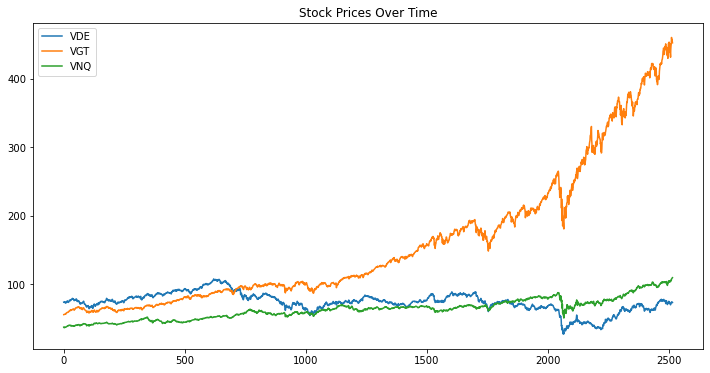

In [35]:
import matplotlib.pyplot as plt

# Plot the 'Price' column for each stock
df_VDE['Price'].plot(label='VDE', figsize=(12, 6))
df_VGT['Price'].plot(label='VGT')
df_VNQ['Price'].plot(label='VNQ')
plt.legend()
plt.title('Stock Prices Over Time')
plt.show()


In [36]:
# Save the cleaned data
df_VDE.to_csv('VDE_10_years_relevant_data_cleaned.csv', index=False)
df_VGT.to_csv('VGT_10_years_relevant_data_cleaned.csv', index=False)
df_VNQ.to_csv('VNQ_10_years_relevant_data_cleaned.csv', index=False)


In [37]:
df_macro.head()

,Interest Rates,GDP Growth Rates,Inflation Rates,Unemployment Rates
DATE,,,,
2012-01-01,0.08,3.3,226.665,8.3
2012-02-01,0.10,NaN,227.663,8.3
2012-03-01,0.13,NaN,229.392,8.2
2012-04-01,0.14,1.8,230.085,8.2
2012-05-01,0.16,NaN,229.815,8.2


In [1]:
print('JAAA')

J
